## <span style="color:orange;"> Grayscale/Desaturation </span>

"Grayscaling" an image, also called desaturation, is when all the color in the image is transformed to appear as a shade of gray without apparent color. Specifically, these shades represent the intensity information of the light. This can be done for a variety of reasons, from taking up less storage space to aesthetics.

When coding this transformation, there are a multitude of different methods that can be used, many of which can be found using a simple [Google search](https://www.google.com/search?q=ways+to+code+grayscaling+of+an+image&oq=ways+to+code+grayscaling+of+an+image&aqs=chrome..69i57j33i10i160j33i299l2.6713j0j7&sourceid=chrome&ie=UTF-8). When looking at it mathematically, 

In [27]:
# Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [ ]:
def grayMethodOne(img):
    img = np.array(img)
    

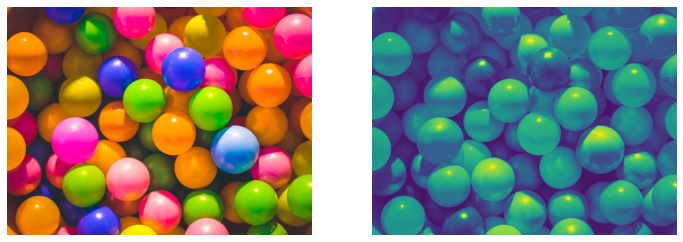

In [30]:
def rgb2gray(img):
    img = np.array(img)
    return np.dot(img, [0.2989, 0.5870, 0.1140])

img = Image.open('test.jpeg')
new = rgb2gray(img)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].imshow(np.array(img))
ax[0].axis('off')   
ax[1].imshow(np.array(new))
ax[1].axis('off')            
plt.show()